# Mining Frequent Patterns from Air Pollution Data

Frequent patterns were generated successfully using frequentPatternGrowth algorithm


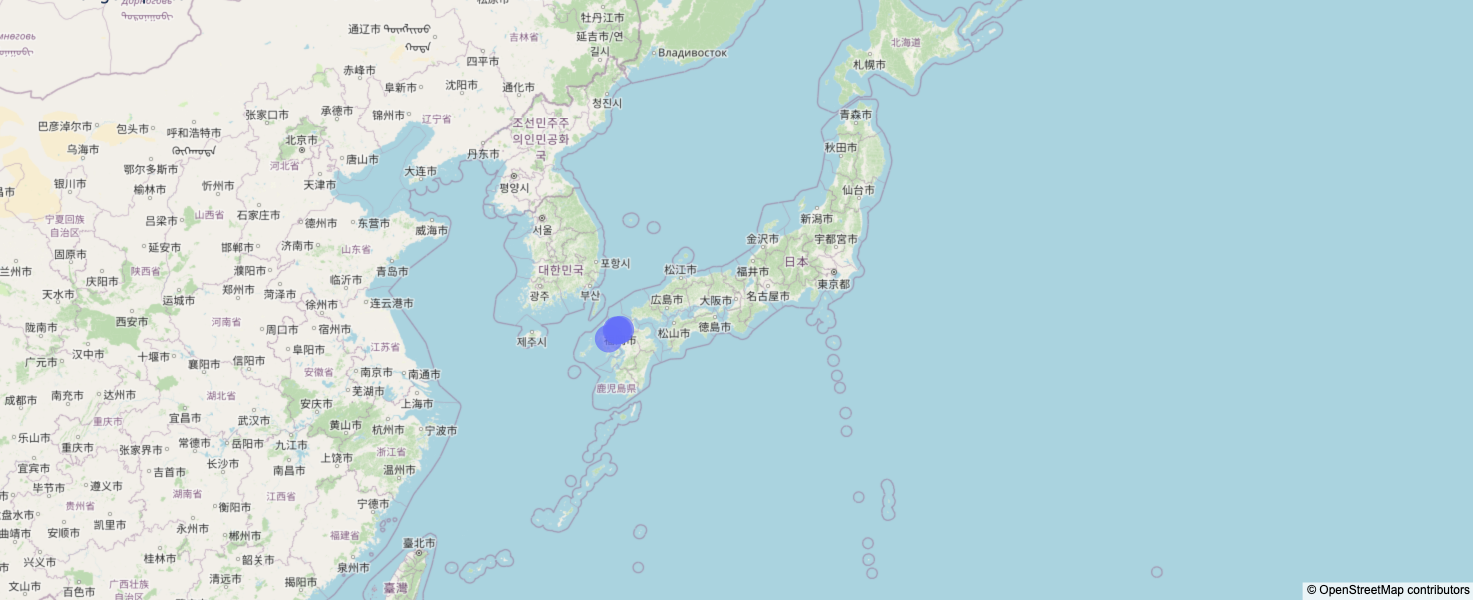

In [35]:
from PAMI.extras.DF2DB import denseDF2DB as pro
from PAMI.frequentPattern.basic import FPGrowth as alg
import plotly.express as px
import pandas as pd

class MFP:
    """
    A class used for mining frequent patterns from airPollutionData.csv
    
    ...
    
    Attributes
    ----------
    fileName : str
        the name of the input file
    
    Methods
    -------
    dataProcessing()
        Transfer dense dataframe to transactional database and save it in PM24HeavyPollutionRecordingSensors.csv.
    knowledgeDiscovery()
        Find out patterns by using FPGrowth.
    visualization()
        Make scatter_mapbox.
    """
    def __init__(self, fileName):
        """
        Parameters
        ----------
        fileName : str
            the name of the input file.
        """
        df = pd.read_csv(fileName).fillna(0)
        self.data = df.where(df['timestamp'].replace('(.*)', 0, regex=True) < 100, 0).drop(columns='timestamp')
        self.dataProcessing()
        self.knowledgeDiscovery()
        self.visualization()

    def dataProcessing(self):
        """
        Transfer dense dataframe to transactional database and save it in PM24HeavyPollutionRecordingSensors.csv.
        
        The value of threshold is greater than or equal to 15.
        
        Parameters
        ----------
        
        Returns
        -------
        None
        """
        db = pro.denseDF2DB(inputDF=self.data, thresholdValue=15, condition='>=')
        db.createTransactional(outputFile='PM24HeavyPollutionRecordingSensors.csv')
    
    def knowledgeDiscovery(self):
        """
        Find out patterns by using FPGrowth.
        
        The minsup is 200.
        
        Parameters
        ----------
        
        Returns
        -------
        None
        """
        inputFile = 'PM24HeavyPollutionRecordingSensors.csv'
        minSup = 200
        obj = alg.FPGrowth(inputFile, minSup)
        obj.startMine()
        obj.save('frequentPatterns.txt')
    
    def visualization(self):
        """
        Make scatter_mapbox.
        
        It is used the file maked by knowledgeDiscovery.
        
        Parameters
        ----------
        
        Returns
        -------
        None
        """
        with open('frequentPatterns.txt', 'r', encoding = 'UTF-8') as f:
            content = f.read()
            lines = content.split('\n')
            max = -1
            longest = -1
            for i in range(len(lines)):
                c = lines[i].split('POINT(')
                if max < len(c):
                    max = len(c)
                    longest = i
            long = []
            lati = []
            p = lines[longest].replace('tid', '').replace(':', ' ').replace('\t', ' ').split()
            for i in p:
                if 'POINT(' in i:
                    long.append(float(i.replace('POINT(', '')))
                elif ')' in i:
                    lati.append(float(i.replace(')', '')))
            figure = px.scatter_mapbox(
                # the setting of the data frame, latitude, and longitude
                lat = lati,
                lon = long,
                # the setting of drawing
                size = [1] * len(lati),
                center = {'lat':34.686567, 'lon':135.52000},
                zoom = 4,
                height = 600,
                width = 800)
            figure.update_layout(mapbox_style='open-street-map')
            figure.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
            figure.update_layout(title_text="longest pattern")
            figure.show()

if __name__ == '__main__':
    MFP('airPollutionData.csv')

# Github Repository link: https://github.com/s1290216/PAMI